# **ML For Business II Final Project**

### **Welcome to our final project!**

The goal here is to predict wether a given comment on a youtube video is a `spam` or not.

To do so, we'll be using a dataset extracted from Kaggle, with labeled data in the column `CLASS` where `1` indicates that the comment is considered a `spam` and `0` otherwise. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("./Youtube-Spam-Dataset.csv")
df = df.copy()
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


### **Part 1: Exploratory Data Analysis**

#### **Checking if Yunan gave me a shitty dataset**

In [5]:
df.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
VIDEO_NAME    object
CLASS          int64
dtype: object

In [6]:
df.shape

(1956, 6)

In [7]:
df.isna().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1953, 6)

#### **1. Temporal Analysis**

##### **A) Dates**

In [10]:
# Zabbeting date column
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['Date'] = df['DATE'].dt.date  


class_over_time = df.groupby(['Date', 'CLASS']).size().unstack(fill_value=0)
class_over_time = class_over_time.reset_index()

class_over_time.columns = ['Date', '0', '1']

class_over_time.head()


,Date,0,1
0,2013-09-05,1,0
1,2013-10-18,0,1
2,2013-11-07,0,2
3,2013-11-08,0,1
4,2013-11-09,0,1


In [11]:
class_over_time_plot = px.line(class_over_time, x="Date", y=["0","1"], 
                               labels = {"value":"Count", "variable":"Class", "0": "Not a Spam", "1": "Spam"},
                               title = "Is there a temporal pattern behind spam comments?")

class_over_time_plot.show()

Nope! The` date of publication` does not appear to be linked to the `comment classification`.


The comments gathered seem to be extracted from specific points in time from `November 2013` to `January 2014`, and from` August 2014` to `June 2015`. 

Despite these distinct periods, there is **no significant trend** in the classification of comments as spam or not **based on their publication date.**

#### **B) Times**

In [12]:
# Same for Times
df['Time'] = df['DATE'].dt.hour  


class_over_hours = df.groupby(['Time', 'CLASS']).size().unstack(fill_value=0)

class_over_hours = class_over_hours.reset_index()

class_over_hours.columns = ['Time', '0', '1']

class_over_hours.head()


,Time,0,1
0,0.0,9,12
1,1.0,12,12
2,2.0,17,16
3,3.0,13,18
4,4.0,12,7


In [13]:
class_over_hours.columns

Index(['Time', '0', '1'], dtype='object')

In [14]:
class_over_hours_plot = px.line(class_over_hours, x="Time", y=["0", "1"],
                                labels = {"value":"Count", "variable":"Class"},
                                title = "Is there a temporal pattern behind spam comments?")

class_over_hours_plot.for_each_trace(lambda t: t.update(name="Not a Spam" if t.name == "0" else "Spam"))

class_over_hours_plot.show()

Neither! There is no evident temporal pattern in the classification of comments as `spam` or `not spam`. 

However, it is noteworthy that there is a **significant increase** in the **total number of comments** posted between 3 PM and 8 PM. 

This spike in activity could indicate a specific time when users are more engaged

Since it's not significant to the classification, let's get rid of the `Date`column

In [15]:
df.drop(columns=["DATE", "Date", "Time"], inplace= True)

#### **2. Data Distribution**

In [16]:
df["CLASS"].value_counts()

CLASS
1    1003
0     950
Name: count, dtype: int64

In [17]:
names_label_distrib = {0: "Not a Spam", 1: "Spam"}

In [18]:
df["LABEL_NAME"] = df["CLASS"].map(names_label_distrib)

In [19]:
label_distrib_plot = px.pie(df, names = "LABEL_NAME",
                       title = "How is the labelled data distribution?", 
                       labels = {0: "Not a Spam", 1: "Spam"} )

label_distrib_plot.show()

Pretty balanced between `spam` and `not spam`

C:\Users\eliel\AppData\Local\Temp\ipykernel_31672\2080192250.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



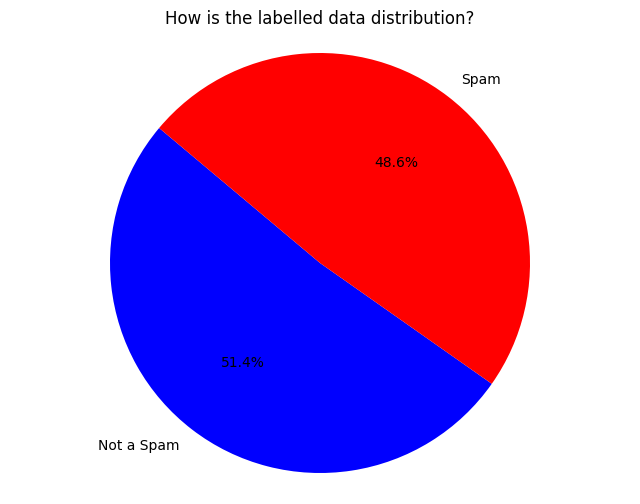

In [20]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains a column named 'LABEL_NAME'
label_counts = df['LABEL_NAME'].value_counts()  # Count occurrences of each label

# Prepare the labels and sizes for the pie chart
labels = ['Not a Spam', 'Spam']
sizes = [label_counts.get(0, 0), label_counts.get(1, 0)]  # Get counts for each label, default to 0 if not found

# Define colors for the pie chart
colors = ['blue', 'red']  # Blue for "Not a Spam", Red for "Spam"

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('How is the labelled data distribution?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [21]:
video_distrib = pd.DataFrame(df["VIDEO_NAME"].value_counts().reset_index())
video_distrib

,VIDEO_NAME,count
0,Eminem - Love The Way You Lie ft. Rihanna,446
1,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",438
2,Shakira - Waka Waka,369
3,PSY - GANGNAM STYLE(?????) M/V,350
4,Katy Perry - Roar,350


In [22]:
video_distrib_plot = px.bar(video_distrib, x= "VIDEO_NAME", y="count", 
                            color= "VIDEO_NAME",
                            title= "How many comment sections do we have?")




video_distrib_plot.update_layout(showlegend = False)
video_distrib_plot.show()

So we have 5 video comment sections

In [23]:
spam_per_vid = pd.DataFrame(df.groupby("VIDEO_NAME")["CLASS"].value_counts().reset_index())
spam_per_vid

,VIDEO_NAME,CLASS,count
0,Eminem - Love The Way You Lie ft. Rihanna,1,243
1,Eminem - Love The Way You Lie ft. Rihanna,0,203
2,Katy Perry - Roar,0,175
3,Katy Perry - Roar,1,175
4,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",1,236
5,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0,202
6,PSY - GANGNAM STYLE(?????) M/V,0,175
7,PSY - GANGNAM STYLE(?????) M/V,1,175
8,Shakira - Waka Waka,0,195
9,Shakira - Waka Waka,1,174


In [24]:
spam_per_vid_plot = px.bar(spam_per_vid, x = "VIDEO_NAME", y="count", color="CLASS",
                           title= "How is the class distribution for each video?")
spam_per_vid_plot.update_layout(showlegend=False)
spam_per_vid_plot

In [25]:
video_distrib

,VIDEO_NAME,count
0,Eminem - Love The Way You Lie ft. Rihanna,446
1,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",438
2,Shakira - Waka Waka,369
3,PSY - GANGNAM STYLE(?????) M/V,350
4,Katy Perry - Roar,350


#### **3. Authors and content analysis**

In [26]:
frequent_authors = pd.DataFrame(df.groupby("AUTHOR").size().sort_values(ascending = False).head().reset_index())
frequent_authors.rename(columns= {0: "Number of comments posted"}, inplace=True)

In [27]:
frequent_authors_plot = px.bar(frequent_authors, color="AUTHOR", x="AUTHOR", y="Number of comments posted",
                              title= "Who are the most frequent authors?")

frequent_authors_plot.update_layout(showlegend = False)

frequent_authors_plot.show()

There are none, because although some authors appear more than once in the dataset, the maximum number of comments left by a single author is 8, which is 0.4% of the dataset, aka `insignificant`

In [28]:
df.head()

,COMMENT_ID,AUTHOR,CONTENT,VIDEO_NAME,CLASS,LABEL_NAME
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,Spam
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,Spam
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,Spam
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,Spam
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,Spam


### **Part 2: First Model**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

In [30]:
import seaborn as sns

In [31]:
X= df["CONTENT"]
y = df["CLASS"]

#### **TF-IDF**

I started with this model because I had already done some research about it last year for another NLP project, but I wasn't able to use it then, so I jumped at this chance. 

In [32]:
def log_reg_tfidf(X, y):

    tfidf_vec = TfidfVectorizer()    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Transform text data into TF-IDF features
    X_train = tfidf_vec.fit_transform(X_train)
    X_test = tfidf_vec.transform(X_test)
    
    log = LogisticRegression(random_state=13).fit(X_train, y_train)
    
    predictions = log.predict(X_test)
    
    # Printing results
    print("Train Score:", log.score(X_train, y_train))
    print("Test Score:", log.score(X_test, y_test))
    
    cm = confusion_matrix(y_test, predictions)

    # Plotting confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Logistic Regression Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
        
    # Get predicted probabilities for class 1 (positive class)
    probabilities = log.predict_proba(X_test)[:, 1]
    
    # Compute and print ROC-AUC score
    roc_auc = roc_auc_score(y_test, probabilities)
    print("ROC-AUC score:", roc_auc)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


Train Score: 0.9737516005121639
Test Score: 0.948849104859335


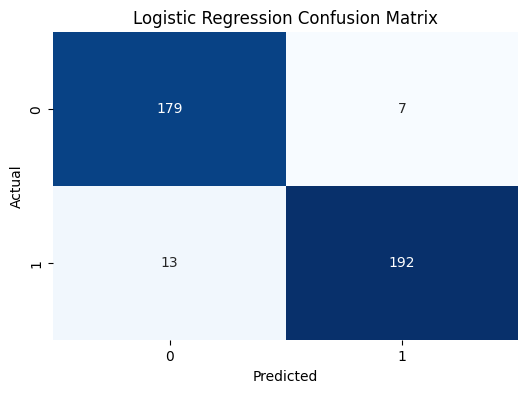

ROC-AUC score: 0.9823236296879099


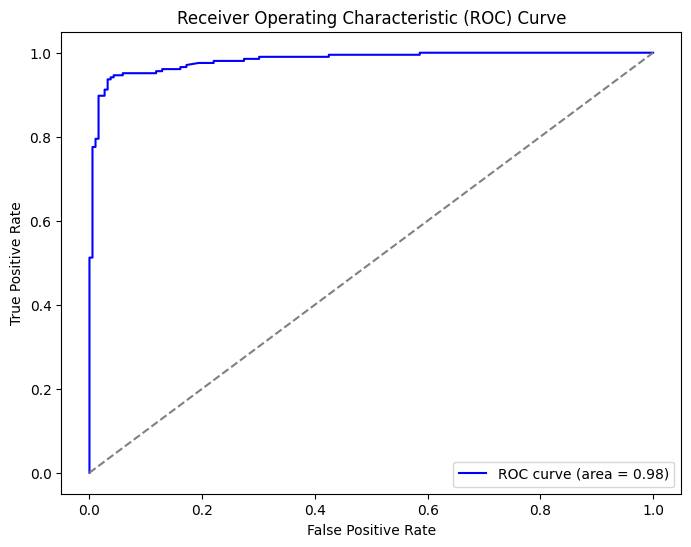

In [33]:
log_reg_tfidf(X,y)

DAMN I'M GOOD 

but still can get a higher score 

### **Part 3: Improving the model**

#### **Count Vectorizer**

While I was researching for the first model, I watched many videos that compared CountVectorizer to TfidfVectorizer, so I kind of had to try it. 

In [34]:
def log_reg_count_vect(X, y):

    vect = CountVectorizer()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Transform text data into count vectors
    X_train = vect.fit_transform(X_train)
    X_test = vect.transform(X_test)
    
    log = LogisticRegression(random_state=13).fit(X_train, y_train)
    
    predictions = log.predict(X_test)
    
    print("Train Score:", log.score(X_train, y_train))
    print("Test Score:", log.score(X_test, y_test))
    
    cm = confusion_matrix(y_test, predictions)

    # Plotting confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Logistic Regression Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()    
    
    # Get predicted probabilities for class 1 (positive class)
    probabilities = log.predict_proba(X_test)[:, 1]
    
    # Compute and print ROC-AUC score
    roc_auc = roc_auc_score(y_test, probabilities)
    print("ROC-AUC score:", roc_auc)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Train Score: 0.9916773367477593
Test Score: 0.9411764705882353


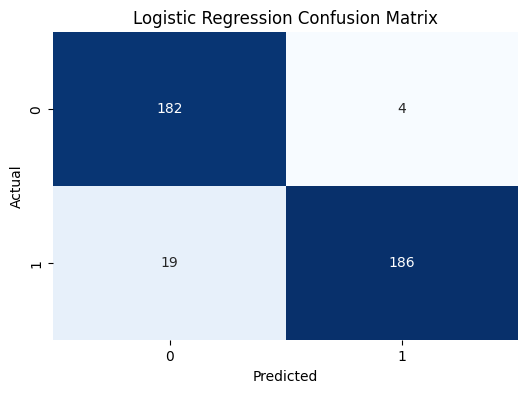

ROC-AUC score: 0.9846052976658799


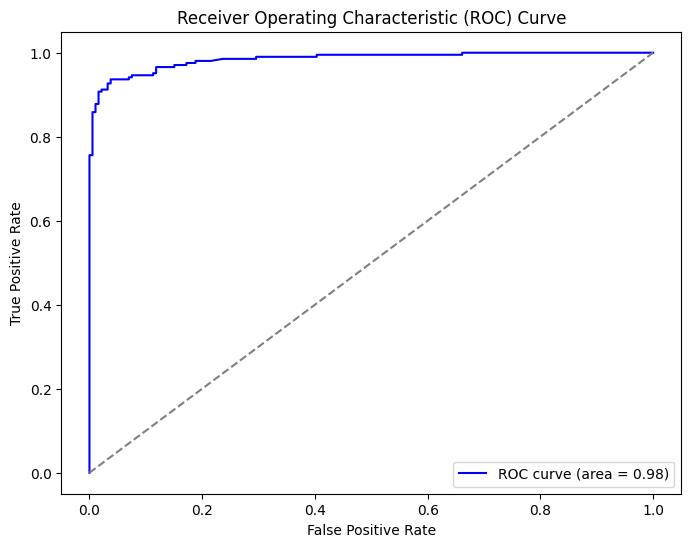

In [35]:
log_reg_count_vect(X,y)

TF-IDF Vectorizer seems to be a better option on our dataset.

#### **Now, let's try to apply what we saw in class**

### **2. Cross Validation and Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

I first did a hyperparameter tuning on `Count Vectorizer` because before solving the data leakage problem it had better performance metrics than `TF-IDF`. 

In [37]:
# def log_reg_count_vect_cross_val(X, y):
#     vect = CountVectorizer()
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
#     # Transform text data into count vectors
#     X_train = vect.fit_transform(X_train)
#     X_test = vect.transform(X_test)
    
#     log = LogisticRegression(random_state=13)
    
#     # Define parameter grid for GridSearchCV
#     param_grid = {
#         "C": [0.01, 0.1, 1, 10, 100],
#         "solver": ["lbfgs", "liblinear"]
#     }
    
#     grid_search = GridSearchCV(log, param_grid=param_grid, cv=5, scoring='accuracy')
    
#     grid_search.fit(X_train, y_train)
    
#     # Best parameters and cross-validation score
#     print('Best params:', grid_search.best_params_)
#     print('Best cross-val score:', grid_search.best_score_)
    
#     # Evaluate on test data with best model
#     best_log = grid_search.best_estimator_
#     predictions = best_log.predict(X_test)
    
#     print("Test Score:", best_log.score(X_test, y_test))
#     print("Classification report:\n", classification_report(y_test, predictions))
    

In [38]:
# log_reg_count_vect_cross_val(X,y)

- Best params:  {'C': 10, 'solver': 'liblinear'}
- Best cross-val score:  0.9545650036864094

In [39]:
def log_reg_count_tfidf_cross_val(X, y):
    tfidf = TfidfVectorizer()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Transform text data into count vectors
    X_train = tfidf.fit_transform(X_train)
    X_test = tfidf.transform(X_test)
    
    log = LogisticRegression(random_state=13)
    
    # Define parameter grid for GridSearchCV
    param_grid = {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs", "liblinear"]
    }
    
    grid_search = GridSearchCV(log, param_grid=param_grid, cv=5, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    # Best parameters and cross-validation score
    print('Best params:', grid_search.best_params_)
    print('Best cross-val score:', grid_search.best_score_)
    
    # Evaluate on test data with best model
    best_log = grid_search.best_estimator_
    predictions = best_log.predict(X_test)
    
    print("Test Score:", best_log.score(X_test, y_test))
    print("Classification report:\n", classification_report(y_test, predictions))
    

In [40]:
log_reg_count_tfidf_cross_val(X,y)

Best params: {'C': 10, 'solver': 'lbfgs'}
Best cross-val score: 0.947503481608913
Test Score: 0.9437340153452686
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       186
           1       0.96      0.93      0.95       205

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



- Best params: {'C': 10, 'solver': 'lbfgs'}
- Best cross-val score: 0.947503481608913
- Test Score: 0.9437340153452686

#### **Testing with best params and score**

In [41]:
def count_vect_bests(X,y):
    vect = CountVectorizer()
    X = vect.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)
    
    log = LogisticRegression(C= 10, solver= "liblinear", random_state=13).fit(X_train,y_train)
    predictions = log.predict(X_test)
    
    print("Train Score", log.score(X_train,y_train))
    print("Test Score", log.score(X_test,y_test))
    print("Classification report:", classification_report(y_test, predictions))
    
    probabilities = log.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (class 1)

    cm = confusion_matrix(y_test, predictions)

    # Plotting confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Logistic Regression Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    roc_auc = roc_auc_score(y_test, probabilities)
    print("ROC-AUC score:", roc_auc)
    
    # Compute ROC curve and plot it
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()    
    

Train Score 1.0
Test Score 0.9411764705882353
Classification report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       186
           1       0.97      0.92      0.94       205

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



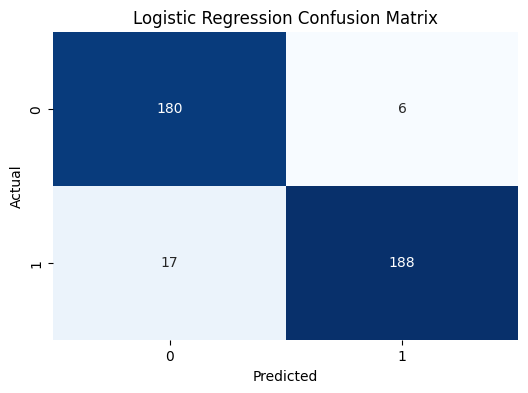

ROC-AUC score: 0.9862575399947547


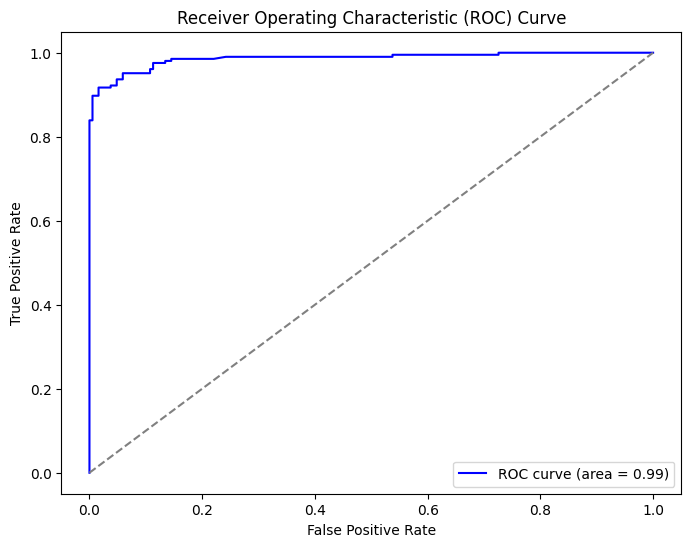

In [42]:
count_vect_bests(X,y)

#### **Good but the baseline model is this better**

#### **What if TfidfVectorizer worked even better with the optimal parameters ?**

In [43]:
def log_reg_tfidf_bests(X, y):

    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    # Initialize TF-IDF vectorizer and fit only on the training data
    tfidf_vec = TfidfVectorizer()
    X_train = tfidf_vec.fit_transform(X_train_raw)
    X_test = tfidf_vec.transform(X_test_raw)
     
    
    # Using the best parameters 
    log = LogisticRegression(C=10, solver="liblinear", random_state=13).fit(X_train, y_train)
    predictions = log.predict(X_test)

    print("Train Score:", log.score(X_train, y_train))
    print("Test Score:", log.score(X_test, y_test))
    print("Classification report:\n", classification_report(y_test, predictions))
    
    # Getting the predicted probabilities for each test sample
    probabilities = log.predict_proba(X_test)
    
    # # Printing the predicted probabilities and corresponding raw text from X_test_raw
    # print("\nPredicted Probabilities for each test sample:")
    # for i, (prob_0, prob_1) in enumerate(probabilities):
    #     print(f"Sample {i + 1}: Class 0 Probability: {prob_0:.4f}, Class 1 Probability: {prob_1:.4f}")
    #     print(f"Comment: {X_test_raw.iloc[i]}\n")  # Use X_test_raw for the original text
    
    # Calculating and printing ROC-AUC score
    roc_auc = roc_auc_score(y_test, probabilities[:, 1])
    print("\nROC-AUC score:", roc_auc)
    
    # Compute and plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


Train Score: 0.9993597951344431
Test Score: 0.9462915601023018
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       186
           1       0.96      0.94      0.95       205

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391


ROC-AUC score: 0.9868607395751376


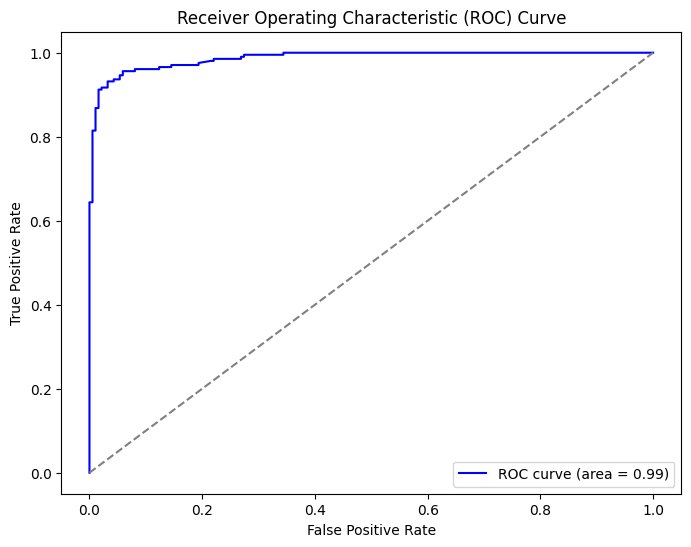

In [44]:
log_reg_tfidf_bests(X,y)

Weirdly enough the baseline model still works better than the one with the optimal parameters ?? 
Yes the accuracy is better on trained data for the optimal parameters model, but test is better with baseline!

Logistic regression might have reached it's limits tho

#### **Lets keep trying something else**

Bernoulli is known for handling well binary classification, let's try it!

In [45]:
from sklearn.naive_bayes import BernoulliNB

In [46]:
def bernoulli(X,y):
    
    vect = CountVectorizer(binary=True)
    X = vect.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

    ber = BernoulliNB()
    
    ber.fit(X_train, y_train)
    predictions = ber.predict(X_test)
    
    print("Train Score", ber.score(X_train,y_train))
    print("Test Score", ber.score(X_test,y_test))
    
    
    probabilities = ber.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (class 1)
    
    cm = confusion_matrix(y_test, predictions)

    # Plotting confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Naive Bayes Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    roc_auc = roc_auc_score(y_test, probabilities)
    print("ROC-AUC score:", roc_auc)
    
    # Compute ROC curve and plot it
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()    
    

Train Score 0.912291933418694
Test Score 0.8746803069053708


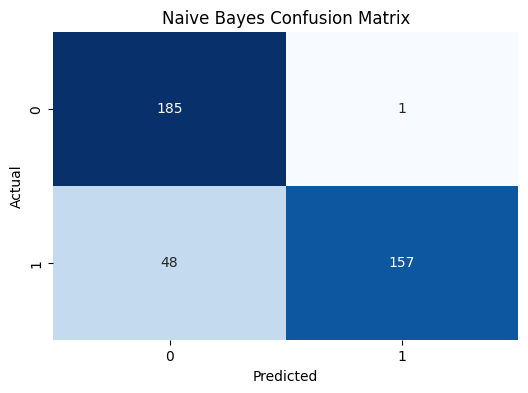

ROC-AUC score: 0.9820613690007867


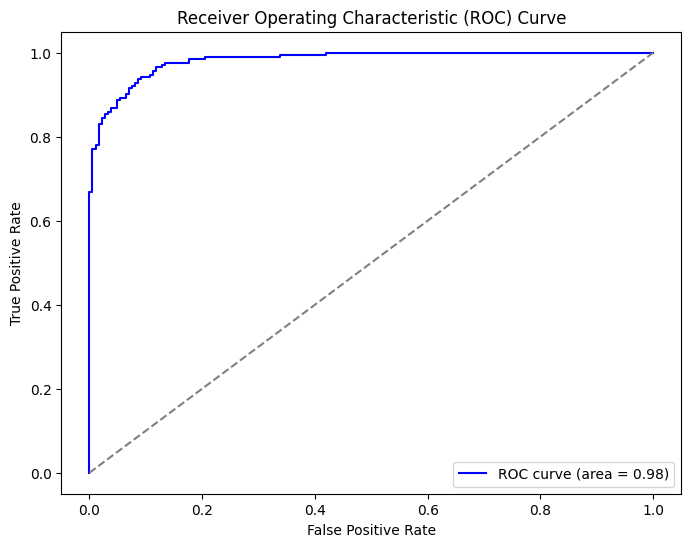

In [47]:
bernoulli(X,y)

That's a **flop**

Logistic Regression seems more efficient than Bernoulli NB, which makes sense when we're classifying spam comments for which frequency and use might be more important than simple appearance.

#### **Let's try and boost this puppy**

In [48]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [81]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def xgb_model(X, y):

    # Vectorize text using TF-IDF
    tfidf_vec = TfidfVectorizer()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    X_train_tfidf = tfidf_vec.fit_transform(X_train)
    X_test_tfidf = tfidf_vec.transform(X_test)

    # Converting to DMatrix (XGBoost's optimized data structure)
    dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
    dtest = xgb.DMatrix(X_test_tfidf, label=y_test)
    
    # XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'max_depth': 6,  # Adjust as necessary
        'learning_rate': 0.1,
        'eval_metric': 'logloss'
    }
    
    # Training the XGBoost model
    xgb_model = xgb.train(params, dtrain, num_boost_round=100)

    # Predict probabilities on the test set
    test_predictions = xgb_model.predict(dtest)
    
    
    # Converting probabilities to binary predictions (0 or 1)
    test_binary_predictions = [1 if pred >= 0.5 else 0 for pred in test_predictions]
    
    # Evaluation
    test_accuracy = accuracy_score(y_test, test_binary_predictions)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, test_binary_predictions)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('XGBoost Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
        
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, test_predictions)
    print(f"ROC AUC Score: {roc_auc:.4f}")


    fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for a random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


Test Accuracy: 0.9540

Confusion Matrix:


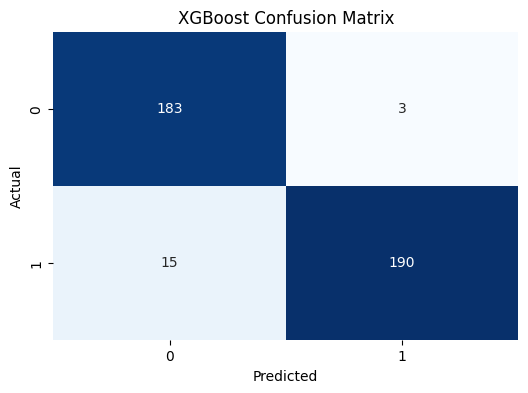

ROC AUC Score: 0.9837


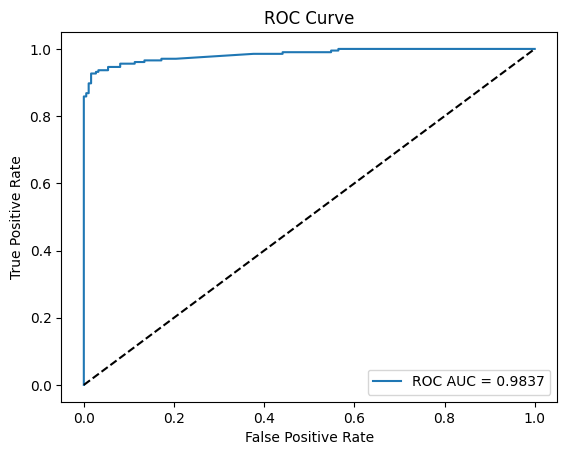

In [82]:
xgb_model(df["CONTENT"], df["CLASS"])
